<span style="font-size:24px;">**Predicting Usage of PlaiCraft**</span>

<span style="font-size:18px;">**Introduction**</span>

A current research study is collecting data about how people play video games on a Minecraft server. The research group conducting this study needs to maximize their recruitment efforts so that they have enough data for their specific research; thus, they have proposed a couple of questions that we, as data science students, will explore and try to answer using our knowledge and the application of data science itself. The question we chose to focus on was, “Which "kinds" of players are most likely to contribute a large amount of data?” In particular, we are going to use data science to predict whether the age and experience level of participants in the study will influence how much time they spend on the server (i.e how much data they contribute). (explain more?)

<span style="font-size:18px;">**Our Question**</span>

Can the age and experience level of participants influence how much time is spent on the server? 

<span style="font-size:18px;">**The Data**</span>



Within this video game research data, there are **two main datasets**:
 
1. **Players.csv** dataset describes general summative information about each participant. The dataset includes 9 columns (variables) and 196 rows (observations). The table below describes each variable within the data set:


| Variable | Type of Variable | Description |
|----------|----------|----------|
| hashedEmail   | character variable (chr) | Participant’s email in unique character code |
| experience	| character variable (chr) | Participant’s previous Minecraft experience |
| subscribe	| logical variable (lgl) | If participant is subscribed to PlaiCraft’s email updates |
| played_hours	| double variable (dbl) | Number of hours played by each participant |
| name	| character variable (chr) | Name of participant |
| gender	| character variable (chr) | Gender of participant |
| age   | double variable (dbl) | Age of participant |
| individualID	| logical variable (lgl) | ID of participant |
| organizationName	| logical variable (lgl) | Organization of participant |


2. **Sessions.csv** focuses on each participant’s play time sessions.  This dataset includes 5 columns (variables) and currently 1535 rows (observations). Below describes each variable within the data set:
 
| Variable | Type of Variable | Description |
|----------|----------|----------|
| hashedEmail   | character variable (chr) | Participant’s email in unique character code |
| start_time	| character variable (chr) | Date and start time of a play session for each participant |
| end_time	| character variable (chr) | Date and end time of a play session for each participant |
| original_start_time	| double variable (dbl) | Scheduled start time in seconds since January 1st, 1970 |
| original_end_time	| double variable (dbl) | Scheduled end time in seconds since January 1st, 1970 |


In this report, we will be using **dataset #1**, although both can be important; our question requires further analysis of dataset #1, **players.csv**. Before we begin using the dataset, let's evaluate some potential issues with the selected data set. 

Potential Issues within this dataset:

    - Experience variable should be stored as a factor variable since it refers to a specific set of catergories
    - IndividualID & OrganizationName are missing values, thus unclear if these variables are signficant
    - Age of participants may be unaccurate as participant's could give false information
    - Privacy concerns regarding participant's name and email

<span style="font-size:18px;">**Beginning Our Analysis**</span>

Before we begin using our dataset to predict and answer our question at hand. We first need to do the necessary steps to load in our data and tidy it up so our functions recognize and can use it.

Let's begin by reading/loading in our data. Before that, let's load the necessary packages that have the functions we can use to actually read in our data.

In [1]:
### Run this cell before continuing. These library packages in R give us functions we can us
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(tidyr)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now we can read in our dataset.

In [2]:
#Since our dataset comes from a url link, we must read it in this way.
url_1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url_1)
players_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Referring back to our question, we want the specific columns **age**, **experience**, and **played_hours**. So let's select these specific columns and name our new data set **players_data_selected**.

In [3]:
players_data_selected <- players_data |>
    select(age, experience, played_hours)
players_data_selected

age,experience,played_hours
<dbl>,<chr>,<dbl>
9,Pro,30.3
17,Veteran,3.8
17,Veteran,0.0
⋮,⋮,⋮
17,Amateur,0.0
17,Amateur,2.3
91,Pro,0.2


To answer our question, we will be using the KNN classification model with the **players_data_selected** data frame. Where age and experience levels will act as our predictors and played_hours will be our response variable. But before we do so, we must perform the necessary steps to wrangle our data, so that it can be effectively used in our classification model.   

In [4]:
#To be able to use age and experience as predictors, we must ensure the data type is of numerical value. 
#Thus, we will change experience to be a numerical variable.
players_data_2 <- players_data_selected |>
  mutate(experience_num = as.numeric(factor(experience, 
                                               levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"),
                                               ordered = TRUE)))
players_data_2

age,experience,played_hours,experience_num
<dbl>,<chr>,<dbl>,<dbl>
9,Pro,30.3,4
17,Veteran,3.8,5
17,Veteran,0.0,5
⋮,⋮,⋮,⋮
17,Amateur,0.0,2
17,Amateur,2.3,2
91,Pro,0.2,4


As we can see from the data frame created, players with experience levels as *Beginner, Amateur, Regular, Pro and Veteran* as *1, 2, 3, 4, and 5*, respectively. Since we want played_hours as our predictor, we must turn played_hours from a double (dbl) variable to a factor (fct) variable. 

In [5]:
#Let's find the average played hours throughout all participants regardless of experience level and age. 
#This allows us to understand how we can classify played_hours into "low, medium and high" contributors.
avg_hours <- players_data_2 |>
    summarise(average_played_hours = mean(played_hours, na.rm = TRUE))
avg_hours

average_played_hours
<dbl>
5.845918


Since our average played hours is ~5.8 hours, we can now define our distribution classifications. Let's assume anything below 1 hours is considered a "low" contribution, between 1 and 6 hours is a "medium" contribution, and anything above 6 hours will be a "high" contribution. 

In [6]:
#Let us first visualize this distribution through a summarized table.
played_hours_distribution <- players_data_2 |>
  mutate(played_hours_category = case_when(
    played_hours < 1 ~ "low",
    played_hours >= 1 & played_hours <= 6 ~ "medium",
    played_hours > 6 ~ "high")) |>
  group_by(played_hours_category) |>
  summarise(count = n())
played_hours_distribution

played_hours_category,count
<chr>,<int>
high,14
low,154
medium,28


As we can see, there are a lot more "low" contribution players rather than high or medium. Let's now add this classification into our data frame.

In [7]:
#In addition, to add this new classification column of played_hours into our data frame, we must convert it to a facto 
#we must convert it to a factor variable in order to use it for our KNN classification model.

data_classified <- players_data_2 |>
  mutate(played_hours_class = case_when(
    played_hours < 1 ~ "low",
    played_hours >= 1 & played_hours <= 6 ~ "medium",
    played_hours > 6 ~ "high")) |>
    mutate(played_hours_class = as.factor(played_hours_class))
data_classified

age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
9,Pro,30.3,4,high
17,Veteran,3.8,5,medium
17,Veteran,0.0,5,low
⋮,⋮,⋮,⋮,⋮
17,Amateur,0.0,2,low
17,Amateur,2.3,2,medium
91,Pro,0.2,4,low


To begin our KNN classification, we initially split our data using a 0.75 proportion to analyze for our model. Next, we split our data into testing and training sets. The training dataset is important to train the KNN model we are creating, and the testing dataset is important because it will tell us how accurate this model's predictions are.

In [8]:
players_split <- initial_split(data_classified, prop = .75, strata = played_hours_class)
players_train <- training(players_split)
players_test <- testing(players_split)
players_train
players_test

age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
17,Veteran,0.0,5,low
21,Amateur,0.7,2,low
21,Regular,0.1,3,low
⋮,⋮,⋮,⋮,⋮
24,Amateur,2.1,2,medium
22,Amateur,32.0,2,high
17,Pro,1.7,4,medium


age,experience,played_hours,experience_num,played_hours_class
<dbl>,<chr>,<dbl>,<dbl>,<fct>
9,Pro,30.3,4,high
17,Veteran,3.8,5,medium
25,Beginner,1.5,1,medium
⋮,⋮,⋮,⋮,⋮
17,Amateur,0.0,2,low
17,Amateur,2.3,2,medium
91,Pro,0.2,4,low


Add text about creating recipe, don't know if we should scale it or not

In [9]:
players_recipe <- recipe(played_hours_class ~ age + experience_num, data = players_train)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Explain here how we used cross-validation to find optimal k value before classifying/using it to predict

→ A | warning: ✖ No observations were detected in `truth` for level: high.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





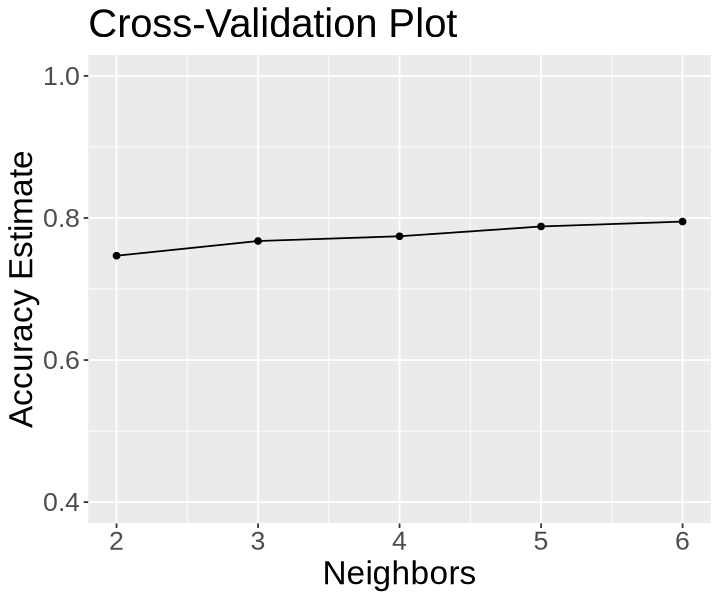

In [10]:
options(repr.plot.height = 5, repr.plot.width = 6)

# your code here
knn_spec_training <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_values <- tibble(neighbors = seq(from = 2, to = 6, by = 1))

training_vfold <- vfold_cv(players_train, v = 5, strat = played_hours_class)

knn_training_results <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(knn_spec_training) |>
       tune_grid(resamples = training_vfold, grid = k_values) |>
       collect_metrics()

training_accuracies <- knn_training_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(training_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Cross-Validation Plot") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0)) +
       theme(text = element_text(size = 20))
cross_val_plot

This shows our most optimal k value is 4/5. (add more info if needed)

Next, we will create model specifications for our KNN classification. This includes specifying the K that we found above. Further, we will fit our data using age and experience levels as our predictors and played_hours as our response variable.

In [20]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)
knn_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 4
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2123288
Best kernel: rectangular
Best k: 4

We then want to see the predictions our model can make.

In [21]:
players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions

.pred_class,age,experience,played_hours,experience_num,played_hours_class
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
low,9,Pro,30.3,4,high
low,17,Veteran,3.8,5,medium
low,25,Beginner,1.5,1,medium
⋮,⋮,⋮,⋮,⋮,⋮
low,17,Amateur,0.0,2,low
low,17,Amateur,2.3,2,medium
low,91,Pro,0.2,4,low


It appears above that all the predictions we can see are low for the predicted played_hours_class. This may mean our predictor is not perfect. We then can find our predictors accuracy. 

In [19]:
players_predictions_accuracy <- players_test_predictions |>
  metrics(truth = played_hours_class, estimate = .pred_class) |>
  filter(.metric == "accuracy")
players_predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.76


This shows that our model has an estimated accuracy of 76% on the test data. Lastly, we can look at the confusion matrix which helps tell us about our model and the mistakes it may be making. 

In [23]:
confusion <- players_test_predictions |>
             conf_mat(truth = played_hours_class, estimate = .pred_class)
confusion

          Truth
Prediction high low medium
    high      0   0      0
    low       3  38      8
    medium    1   0      0

This confusion matrix tells us that our classification made a few mistakes, like classifying eight mediums as low, and one high as medium. We can continue to learn about how effective the classification is by calculating the accuracy, precision, and recall from values in the above table

In [40]:
#accuracy = (number of correct predictions)/(total number of predictions)  
accuracy <- (38)/(3 + 38 + 8 + 1)
accuracy

#precision = (number of correct positive predictions)/(total number of positive predictions) 
precision <- (38)/(38)
precision

#recall = (number of correct positive predictions)/(total number of positive test set observations)
recall <- (38)/(38)
recall

[1] 0.76

[1] 1

[1] 1

Thus, the accuracy is 0.76, the precision is 1, and the recall is 1.The next step is to visualize the model and classification we made. 

- not entirely sure i calculated the last two correctly 

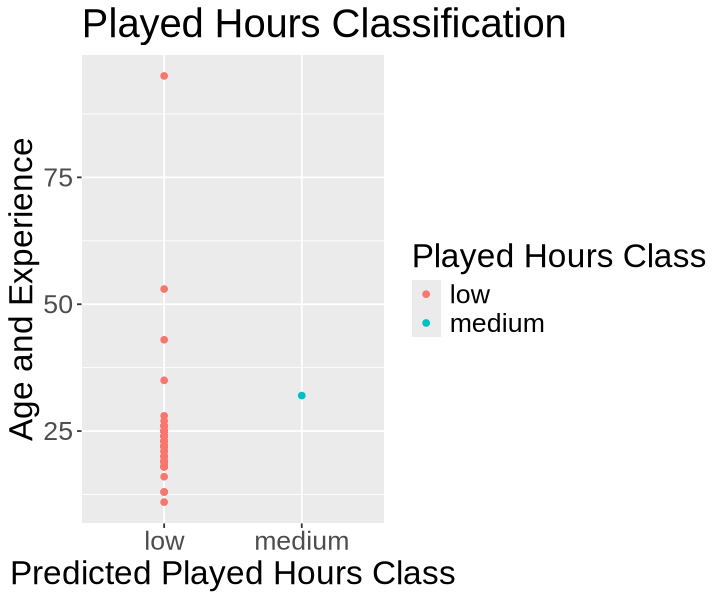

In [39]:
options(repr.height.plot = 15, repr.width.plot = 20)
players_visualization <- players_test_predictions |>
    ggplot(aes(x = .pred_class, y = age + experience_num, color = .pred_class)) +
    geom_point() +
    labs(x = "Predicted Played Hours Class", y = "Age and Experience", title = "Played Hours Classification",
        color = "Played Hours Class") +
    theme(text = element_text(size = 20))
players_visualization

Figure 1: Scatterplot of the predicted class of played hours with the predictor variables player age and experience. 

When analyzing the classification we performed, we know that it is only 76% accurate. Evaluating this value depends on the starting data. 

- i think we should set the seed so its replicable, also do we need exploratory graphs ?, also my graph might be a bit funky but i cant figure out how to change it